# Betting Odds and Win Probabilities

We now look at betting odds for the entire season across the five sports we looked at in the first course of this series. We will derive the probabilities from the odds, adjusting for the overround. 

We will then look at one way of measuring the reliability of the bookmaker probabilities. We will examine the expected win percentage or points won in the league based on the betting odds, and then calculate the correlation between this and the win percentage or points actually won during the season. 

We'll begin by looking at the NBA 2018/19 regular season.

In [1]:
# install the packages we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data

NBA19 = pd.read_excel("../../Data/Week 2/NBA2019odds.xlsx")
NBA19

,team,opponent,day,month,year,winodds,loseodds,teampts,oppopts,overtime,home,Game(home-away),HAscore,win
0,Atlanta Hawks,New York Knicks,18,10,2018,2.39,1.60,107,126,0,0,New York Knicks - Atlanta Hawks,126:107,0
1,Atlanta Hawks,Memphis Grizzlies,20,10,2018,3.34,1.34,117,131,0,0,Memphis Grizzlies - Atlanta Hawks,131:117,0
2,Atlanta Hawks,Cleveland Cavaliers,22,10,2018,3.97,1.26,133,111,0,0,Cleveland Cavaliers - Atlanta Hawks,111:133,1
3,Atlanta Hawks,Dallas Mavericks,25,10,2018,2.07,1.79,111,104,0,1,Atlanta Hawks - Dallas Mavericks,111:104,1
4,Atlanta Hawks,Chicago Bulls,28,10,2018,1.43,2.91,85,97,0,1,Atlanta Hawks - Chicago Bulls,85:97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,Washington Wizards,Denver Nuggets,1,4,2019,5.68,1.15,95,90,0,0,Denver Nuggets - Washington Wizards,90:95,1
2456,Washington Wizards,Chicago Bulls,4,4,2019,1.19,5.00,114,115,0,1,Washington Wizards - Chicago Bulls,114:115,0
2457,Washington Wizards,San Antonio Spurs,6,4,2019,3.22,1.37,112,129,0,1,Washington Wizards - San Antonio Spurs,112:129,0
2458,Washington Wizards,New York Knicks,8,4,2019,1.58,2.44,110,113,0,0,New York Knicks - Washington Wizards,113:110,0


Note that our data is 2460 rows long, which is exacly twice the number of regular season games (1230). Thus we have a list of every game played by each team in the season (82 games in total).

We now calculate the probabilities implied by the decimal odds. Recall that we derive this by (a) taking the reciprocal of the odds and (b) dividing by the sum of all probabilities (because of the overround we have to scale the probabilities so that they add up to 100%). We can do this in one line of code:

In [3]:
NBA19['winprob']= 1/(NBA19['winodds'])/(1/(NBA19['winodds'])+ 1/(NBA19['loseodds']))
NBA19

,team,opponent,day,month,year,winodds,loseodds,teampts,oppopts,overtime,home,Game(home-away),HAscore,win,winprob
0,Atlanta Hawks,New York Knicks,18,10,2018,2.39,1.60,107,126,0,0,New York Knicks - Atlanta Hawks,126:107,0,0.401003
1,Atlanta Hawks,Memphis Grizzlies,20,10,2018,3.34,1.34,117,131,0,0,Memphis Grizzlies - Atlanta Hawks,131:117,0,0.286325
2,Atlanta Hawks,Cleveland Cavaliers,22,10,2018,3.97,1.26,133,111,0,0,Cleveland Cavaliers - Atlanta Hawks,111:133,1,0.240918
3,Atlanta Hawks,Dallas Mavericks,25,10,2018,2.07,1.79,111,104,0,1,Atlanta Hawks - Dallas Mavericks,111:104,1,0.463731
4,Atlanta Hawks,Chicago Bulls,28,10,2018,1.43,2.91,85,97,0,1,Atlanta Hawks - Chicago Bulls,85:97,0,0.670507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,Washington Wizards,Denver Nuggets,1,4,2019,5.68,1.15,95,90,0,0,Denver Nuggets - Washington Wizards,90:95,1,0.168375
2456,Washington Wizards,Chicago Bulls,4,4,2019,1.19,5.00,114,115,0,1,Washington Wizards - Chicago Bulls,114:115,0,0.807754
2457,Washington Wizards,San Antonio Spurs,6,4,2019,3.22,1.37,112,129,0,1,Washington Wizards - San Antonio Spurs,112:129,0,0.298475
2458,Washington Wizards,New York Knicks,8,4,2019,1.58,2.44,110,113,0,0,New York Knicks - Washington Wizards,113:110,0,0.606965


These are the win probabilities for each team in each game of the season. We also have the variable 'win' which denotes whether the team actually won the game or not. 

We can now calculate both the total number of wins for each team during the regular season and the *expected* number of wins, which equals the sum of win probabilities for the season. 

We can calculate this using the .groupby command:

In [4]:
NBAteamprobs=NBA19.groupby('team')[['winprob','win']].mean()
NBAteamprobs

,winprob,win
team,,
Atlanta Hawks,0.313679,0.353659
Boston Celtics,0.634365,0.597561
Brooklyn Nets,0.445081,0.512195
Charlotte Hornets,0.492572,0.475610
Chicago Bulls,0.307335,0.268293
Cleveland Cavaliers,0.257142,0.231707
Dallas Mavericks,0.427560,0.402439
Denver Nuggets,0.615707,0.658537
Detroit Pistons,0.496879,0.500000


By inspection it seems clear that the total for actual wins and expected wins is quite close. 

We can see this more clearly if we use a scatterplot:

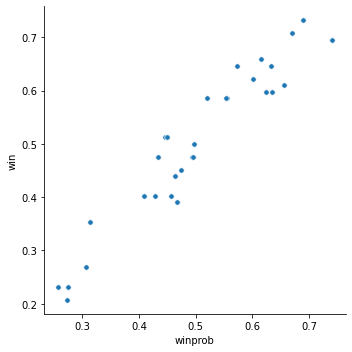

In [5]:
sns.relplot(x="winprob", y="win", data = NBAteamprobs, s=30)

And we can measure the closeness of the relationship precisely using the correlation coefficient:

In [6]:
np.corrcoef(NBAteamprobs["winprob"], NBAteamprobs['win'])

array([[1.        , 0.95700262],
       [0.95700262, 1.        ]])

From this it seems clear that the betting odds relate quite closely to the actual outcomes for each team in the NBA, *on average*.

## Self Test - 1

Derive the comparable scatter diagram and correlation coefficient for the MLB data (the odds are also in the decimal format).

In [7]:
MLB19 = pd.read_excel("../../Data/Week 2/MLB2019odds.xlsx")

MLB19.head()

,team,opponent,day,month,home,oddsfor,oddsagainst,runsfor,runsagainst,win,game home team- away team,score,date
0,Arizona Diamondbacks,Atlanta Braves,10,5,1,1.91,1.92,3,2,1,Arizona Diamondbacks - Atlanta Braves,03:02:00,10.05.
1,Arizona Diamondbacks,Atlanta Braves,11,5,1,1.73,2.14,1,2,0,Arizona Diamondbacks - Atlanta Braves,01:02:00,11.05.
2,Arizona Diamondbacks,Atlanta Braves,12,5,1,2.03,1.82,3,5,0,Arizona Diamondbacks - Atlanta Braves,03:05:00,12.05.
3,Arizona Diamondbacks,Atlanta Braves,12,5,1,2.06,1.79,4,6,0,Arizona Diamondbacks - Atlanta Braves,04:06:00,12.05.
4,Arizona Diamondbacks,Baltimore Orioles,23,7,1,1.39,3.08,6,3,1,Arizona Diamondbacks - Baltimore Orioles,06:03:00,23.07.


In [9]:
MLB19['winprob']= 1/ (MLB19.oddsfor) / (1/ MLB19.oddsfor + 1/MLB19.oddsagainst)
MLB19

,team,opponent,day,month,home,oddsfor,oddsagainst,runsfor,runsagainst,win,game home team- away team,score,date,winprob
0,Arizona Diamondbacks,Atlanta Braves,10,5,1,1.91,1.92,3,2,1,Arizona Diamondbacks - Atlanta Braves,03:02:00,10.05.,0.501305
1,Arizona Diamondbacks,Atlanta Braves,11,5,1,1.73,2.14,1,2,0,Arizona Diamondbacks - Atlanta Braves,01:02:00,11.05.,0.552972
2,Arizona Diamondbacks,Atlanta Braves,12,5,1,2.03,1.82,3,5,0,Arizona Diamondbacks - Atlanta Braves,03:05:00,12.05.,0.472727
3,Arizona Diamondbacks,Atlanta Braves,12,5,1,2.06,1.79,4,6,0,Arizona Diamondbacks - Atlanta Braves,04:06:00,12.05.,0.464935
4,Arizona Diamondbacks,Baltimore Orioles,23,7,1,1.39,3.08,6,3,1,Arizona Diamondbacks - Baltimore Orioles,06:03:00,23.07.,0.689038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,San Francisco Giants,Washington Nationals,18,4,0,2.30,1.66,6,9,0,Washington Nationals - San Francisco Giants,09:06:00,18.04.,0.419192
4856,St.Louis Cardinals,Washington Nationals,1,5,0,1.87,1.98,3,2,1,Washington Nationals - St.Louis Cardinals,02:03:00,01.05.,0.514286
4857,St.Louis Cardinals,Washington Nationals,2,5,0,2.36,1.62,1,2,0,Washington Nationals - St.Louis Cardinals,02:01:00,02.05.,0.407035
4858,St.Louis Cardinals,Washington Nationals,2,5,0,2.23,1.68,5,1,1,Washington Nationals - St.Louis Cardinals,01:05:00,02.05.,0.429668


In [11]:
MLBteamprobs= MLB19.groupby(['team'])['win', 'winprob'].mean()
MLBteamprobs

,win,winprob
team,,
Arizona Diamondbacks,0.524691,0.490848
Atlanta Braves,0.598765,0.540956
Baltimore Orioles,0.333333,0.374573
Boston Red Sox,0.518519,0.579134
Chicago Cubs,0.518519,0.539655
Chicago White Sox,0.444444,0.426492
Cincinnati Reds,0.462963,0.491491
Cleveland Indians,0.574074,0.571819
Colorado Rockies,0.438272,0.458536


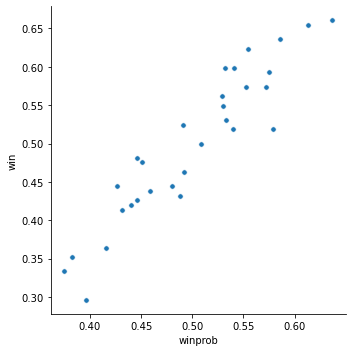

In [12]:
sns.relplot(x='winprob', y='win', data=MLBteamprobs, s=30)

In [13]:
MLBteamprobs.corr()

,win,winprob
win,1.000000,0.933479
winprob,0.933479,1.000000


 We now consider leagues where each game has three possible outcomes. Ties used to be possible in the NHL, but nowadays every game must end in a win or a loss. If the game is tied in regular time, the teams play overtime and then penalties if necessary. The winning team is awarded two points, but if a game is tied at the end of regular time then the team that eventually loses is awarded a point for an overtime loss (OTL). 

We now look at the NHL data for the 2018/19 season:

In [8]:
NHL19 = pd.read_excel("../../Data/Week 2/NHL2018-19odds.xlsx")
NHL19

,team,opponent,day,month,year,home,winodds,tieodds,loseodds,teamgoals,oppogoals,overtime,pen,win,loss,OTL,game-ht-at,scoreht-at
0,San Jose Sharks,Anaheim Ducks,4,10,2018,1,1.87,4.08,3.50,2,5,0,0,0,1,0,San Jose Sharks - Anaheim Ducks,02:05:00
1,Toronto Maple Leafs,Montreal Canadiens,4,10,2018,1,1.65,4.57,4.21,3,2,1,0,1,0,0,Toronto Maple Leafs - Montreal Canadiens,3:2 ET
2,Vancouver Canucks,Calgary Flames,4,10,2018,1,2.82,4.03,2.17,5,2,0,0,1,0,0,Vancouver Canucks - Calgary Flames,05:02:00
3,Washington Capitals,Boston Bruins,4,10,2018,1,2.32,3.97,2.62,7,0,0,0,1,0,0,Washington Capitals - Boston Bruins,07:00:00
4,Buffalo Sabres,Boston Bruins,5,10,2018,1,2.79,3.98,2.19,0,4,0,0,0,1,0,Buffalo Sabres - Boston Bruins,00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,Columbus Blue Jackets,Ottawa Senators,7,4,2019,0,1.82,4.29,3.55,6,2,0,0,1,0,0,Ottawa Senators - Columbus Blue Jackets,02:06:00
2538,Carolina Hurricanes,Philadelphia Flyers,7,4,2019,0,2.06,4.26,2.88,4,3,0,0,1,0,0,Philadelphia Flyers - Carolina Hurricanes,03:04:00
2539,New York Rangers,Pittsburgh Penguins,7,4,2019,0,4.95,4.95,1.51,4,3,1,0,1,0,0,Pittsburgh Penguins - New York Rangers,3:4 ET
2540,Colorado Avalanche,San Jose Sharks,7,4,2019,0,3.21,4.21,1.94,2,5,0,0,0,1,0,San Jose Sharks - Colorado Avalanche,05:02:00


The data is in decimal odds form, so we derive the probabilities of win or a tie (OTL) as equal to the reciprocal of the odds divided by sum of odds reciprocals so that the probabilities sum to 100%. 

In [9]:
NHL19['winprob']= 1/(NHL19['winodds'])/(1/(NHL19['winodds'])+ 1/(NHL19['tieodds'])+ 1/(NHL19['loseodds']))
NHL19['tieprob']= 1/(NHL19['tieodds'])/(1/(NHL19['winodds'])+ 1/(NHL19['tieodds'])+ 1/(NHL19['loseodds']))
NHL19

,team,opponent,day,month,year,home,winodds,tieodds,loseodds,teamgoals,oppogoals,overtime,pen,win,loss,OTL,game-ht-at,scoreht-at,winprob,tieprob
0,San Jose Sharks,Anaheim Ducks,4,10,2018,1,1.87,4.08,3.50,2,5,0,0,0,1,0,San Jose Sharks - Anaheim Ducks,02:05:00,0.501852,0.230016
1,Toronto Maple Leafs,Montreal Canadiens,4,10,2018,1,1.65,4.57,4.21,3,2,1,0,1,0,0,Toronto Maple Leafs - Montreal Canadiens,3:2 ET,0.570459,0.205964
2,Vancouver Canucks,Calgary Flames,4,10,2018,1,2.82,4.03,2.17,5,2,0,0,1,0,0,Vancouver Canucks - Calgary Flames,05:02:00,0.333412,0.233306
3,Washington Capitals,Boston Bruins,4,10,2018,1,2.32,3.97,2.62,7,0,0,0,1,0,0,Washington Capitals - Boston Bruins,07:00:00,0.404878,0.236604
4,Buffalo Sabres,Boston Bruins,5,10,2018,1,2.79,3.98,2.19,0,4,0,0,0,1,0,Buffalo Sabres - Boston Bruins,00:04:00,0.336137,0.235634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,Columbus Blue Jackets,Ottawa Senators,7,4,2019,0,1.82,4.29,3.55,6,2,0,0,1,0,0,Ottawa Senators - Columbus Blue Jackets,02:06:00,0.516284,0.219030
2538,Carolina Hurricanes,Philadelphia Flyers,7,4,2019,0,2.06,4.26,2.88,4,3,0,0,1,0,0,Philadelphia Flyers - Carolina Hurricanes,03:04:00,0.454784,0.219919
2539,New York Rangers,Pittsburgh Penguins,7,4,2019,0,4.95,4.95,1.51,4,3,1,0,1,0,0,Pittsburgh Penguins - New York Rangers,3:4 ET,0.189460,0.189460
2540,Colorado Avalanche,San Jose Sharks,7,4,2019,0,3.21,4.21,1.94,2,5,0,0,0,1,0,San Jose Sharks - Colorado Avalanche,05:02:00,0.292645,0.223133


We calculate the points won in each game by each team in the season:

In [10]:
NHL19['pts']= 2*NHL19['win']+NHL19['OTL']

And now the expected points in each game based on the win probability and tie probability:

In [11]:
NHL19['Epts']= 2*NHL19['winprob']+NHL19['tieprob']

Now we sum the points and expected points for each team using .groupby.

In [12]:
NHLteamprobs=NHL19.groupby('team')[['Epts','pts']].sum()
NHLteamprobs

,Epts,pts
team,,
Anaheim Ducks,73.064804,80
Arizona Coyotes,74.448499,86
Boston Bruins,91.976236,107
Buffalo Sabres,74.213314,76
Calgary Flames,91.254217,107
Carolina Hurricanes,87.355628,99
Chicago Blackhawks,73.737998,84
Colorado Avalanche,83.913533,90
Columbus Blue Jackets,88.362916,98


We use a scatter diagram to plot the relationship between points and expected points:

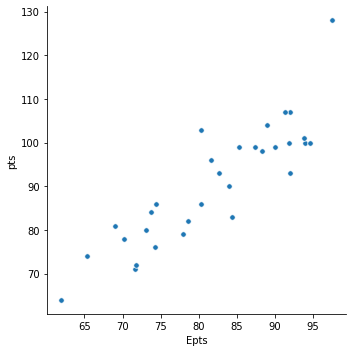

In [13]:
sns.relplot(x="Epts", y="pts", data = NHLteamprobs, s=30)

And we can measure the closeness of the relationship precisely using the correlation coefficient:

In [14]:
np.corrcoef(NHLteamprobs["Epts"], NHLteamprobs['pts'])

array([[1.        , 0.87987833],
       [0.87987833, 1.        ]])

As with the NBA and MLB, we see a close correlation between the expected outcome based on the bookmaker odds and the actual outcome.

## Self Test - 2

Derive the comparable scatter diagram and correlation coefficient for the EPL data. The odds are also in the decimal format. In the EPL, teams are awarded three points for a win and one point for a draw.

In [15]:
EPL19 = pd.read_excel("../../Data/Week 2/EPL2018-19odds.xlsx")
NHL19['winprob']= 1/(NHL19['winodds'])/(1/(NHL19['winodds'])+ 1/(NHL19['tieodds'])+ 1/(NHL19['loseodds']))
NHL19['tieprob']= 1/(NHL19['tieodds'])/(1/(NHL19['winodds'])+ 1/(NHL19['tieodds'])+ 1/(NHL19['loseodds']))
NHL19
#Your code here
EPL19['winprob']= 1/(EPL19.winodds)/ (1/EPL)

Finally, we look at the case of the Indian Premier League. As with the NBA and MLB, each game must result in a win or a loss.

In [16]:
IPL18 = pd.read_excel("../../Data/Week 2/IPL2018odds.xlsx")
IPL18

,date,team,oppo,home,teamwinodds,oppowinodds,teamscore,opposcore,teamwin,playoff,DLS result,home-away teams,score
0,2018-04-07 00:00:00,Chennai Super Kings,Mumbai Indians,0,104,-130,169,165,1,0,0,Mumbai Indians - Chennai Super Kings,165:169
1,2018-04-08 00:00:00,Kings XI Punjab,Delhi Capitals,0,-143,114,167,166,1,0,0,Delhi Capitals - Kings XI Punjab,166:167
2,2018-04-08 00:00:00,Royal Challengers Bangalore,Kolkata Knight Riders,0,-143,114,176,177,0,0,0,Kolkata Knight Riders - Royal Challengers Bang...,177:176
3,2018-04-09 00:00:00,Rajasthan Royals,Sunrisers Hyderabad,0,144,-179,125,127,0,0,0,Sunrisers Hyderabad - Rajasthan Royals,127:125
4,2018-04-10 00:00:00,Kolkata Knight Riders,Chennai Super Kings,0,-104,-118,202,205,0,0,0,Chennai Super Kings - Kolkata Knight Riders,205:202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2018-05-20 00:00:00,Delhi Capitals,Mumbai Indians,1,167,-213,174,163,1,0,0,Delhi Capitals - Mumbai Indians,174:163
116,22/5/2018,Sunrisers Hyderabad,Chennai Super Kings,1,121,-149,139,140,0,1,0,Sunrisers Hyderabad - Chennai Super Kings,139:140
117,23/5/2018,Kolkata Knight Riders,Rajasthan Royals,1,-192,154,169,144,1,1,0,Kolkata Knight Riders - Rajasthan Royals,169:144
118,25/5/2018,Kolkata Knight Riders,Sunrisers Hyderabad,1,-156,125,161,174,0,1,0,Kolkata Knight Riders - Sunrisers Hyderabad,161:174


The IPL betting odds are expressed in moneyline format. Remember that if the moneyline odds are positive then the implied probability is 100/(100+moneyline) and if the moneyline odds are negative then the implied probability is -moneyline/(100-moneyline. 

Here we derive the implied probability without adjusting for overround (winprobX) and then we divide by the sum of probabilities (winprob) so the probabilities sum to 100%.

In [17]:
IPL18['winprobX']= np.where(IPL18['teamwinodds']>0, 100/(100+IPL18['teamwinodds']),\
                           -IPL18['teamwinodds']/(100-IPL18['teamwinodds']))
IPL18['loseprobX']= np.where(IPL18['oppowinodds']>0, 100/(100+IPL18['oppowinodds']),\
                           -IPL18['oppowinodds']/(100-IPL18['oppowinodds']))

IPL18['winprob']=IPL18['winprobX']/(IPL18['winprobX']+IPL18['loseprobX'])

IPL18

,date,team,oppo,home,teamwinodds,oppowinodds,teamscore,opposcore,teamwin,playoff,DLS result,home-away teams,score,winprobX,loseprobX,winprob
0,2018-04-07 00:00:00,Chennai Super Kings,Mumbai Indians,0,104,-130,169,165,1,0,0,Mumbai Indians - Chennai Super Kings,165:169,0.490196,0.565217,0.464459
1,2018-04-08 00:00:00,Kings XI Punjab,Delhi Capitals,0,-143,114,167,166,1,0,0,Delhi Capitals - Kings XI Punjab,166:167,0.588477,0.467290,0.557393
2,2018-04-08 00:00:00,Royal Challengers Bangalore,Kolkata Knight Riders,0,-143,114,176,177,0,0,0,Kolkata Knight Riders - Royal Challengers Bang...,177:176,0.588477,0.467290,0.557393
3,2018-04-09 00:00:00,Rajasthan Royals,Sunrisers Hyderabad,0,144,-179,125,127,0,0,0,Sunrisers Hyderabad - Rajasthan Royals,127:125,0.409836,0.641577,0.389795
4,2018-04-10 00:00:00,Kolkata Knight Riders,Chennai Super Kings,0,-104,-118,202,205,0,0,0,Chennai Super Kings - Kolkata Knight Riders,205:202,0.509804,0.541284,0.485025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2018-05-20 00:00:00,Delhi Capitals,Mumbai Indians,1,167,-213,174,163,1,0,0,Delhi Capitals - Mumbai Indians,174:163,0.374532,0.680511,0.354992
116,22/5/2018,Sunrisers Hyderabad,Chennai Super Kings,1,121,-149,139,140,0,1,0,Sunrisers Hyderabad - Chennai Super Kings,139:140,0.452489,0.598394,0.430580
117,23/5/2018,Kolkata Knight Riders,Rajasthan Royals,1,-192,154,169,144,1,1,0,Kolkata Knight Riders - Rajasthan Royals,169:144,0.657534,0.393701,0.625487
118,25/5/2018,Kolkata Knight Riders,Sunrisers Hyderabad,1,-156,125,161,174,0,1,0,Kolkata Knight Riders - Sunrisers Hyderabad,161:174,0.609375,0.444444,0.578254


Now we sum the wins and expected wins for each team using .groupby:

In [18]:
IPLteamprobs=IPL18.groupby('team')[['winprob','teamwin']].mean()
IPLteamprobs

,winprob,teamwin
team,,
Chennai Super Kings,0.523728,0.687500
Delhi Capitals,0.438062,0.357143
Kings XI Punjab,0.505387,0.428571
Kolkata Knight Riders,0.550237,0.562500
Mumbai Indians,0.542455,0.428571
Rajasthan Royals,0.407361,0.466667
Royal Challengers Bangalore,0.552693,0.428571
Sunrisers Hyderabad,0.480340,0.588235


We use a scatter diagram to plot the relationship between wins and expected wins:

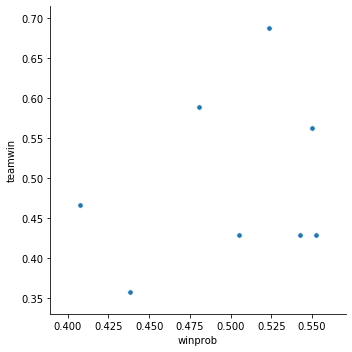

In [19]:
sns.relplot(x="winprob", y="teamwin", data = IPLteamprobs, s=30)

And we can measure the closeness of the relationship precisely using the correlation coefficient:

In [20]:
np.corrcoef(IPLteamprobs["winprob"], IPLteamprobs['teamwin'])

array([[1.        , 0.25673363],
       [0.25673363, 1.        ]])

Unlike the other leagues we have looked at, we can see that there is a much weaker correlation between the bookmaking odds and and the outcomes in the IPL, suggesting that the bookmaker odds are less reliable in the IPL.

## Conclusion

We have now seen how to convert bookmaker odds into probabilities in a variety of different sports. 

With the exception of the IPL, we have found a close correlation between bookmaker odds and actual outcomes over the season.

However, this is not an especially good test of reliability. Bookmaker odds are set before each game, so as the season progresses the bookmaker has more and more information about the form of the teams. By aggregating the data in the way we have, we have added up forecasts made at different times without assessing their accuracy individually.

In the next session we will examine the Brier Score, which is a more reliable way of assessing a set of forecasts.